# Portuguese Bank Marketing Campaign ML Project

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [3]:
# 2. Load Dataset
df = pd.read_csv("bank-additional-full.csv", sep=';')

# Preview data
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
df.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [6]:
#3. Basic Info & Cleaning

print("\nInfo:")
df.info()




Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 no

In [7]:
#findout missing value
print("\nMissing values:")
print(df.isin(['unknown']).sum())


Missing values:
age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [8]:
# Replace 'unknown' with NaN for proper handling
df.replace('unknown', np.nan, inplace=True)


In [9]:
## find out duplicate recodes
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,NaN,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,NaN,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [10]:
## deleteing duplicates
df.drop_duplicates(inplace=True)

In [11]:
# Drop 'duration' column (as per instruction)
df.drop('duration', axis=1, inplace=True)

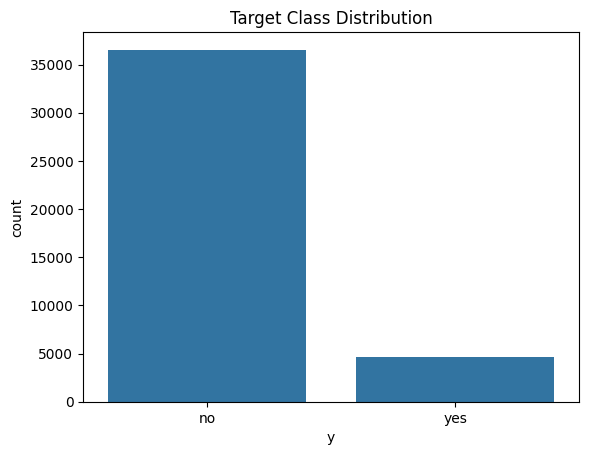

In [12]:
# Target class distribution
sns.countplot(x='y', data=df)
plt.title("Target Class Distribution")
plt.show()

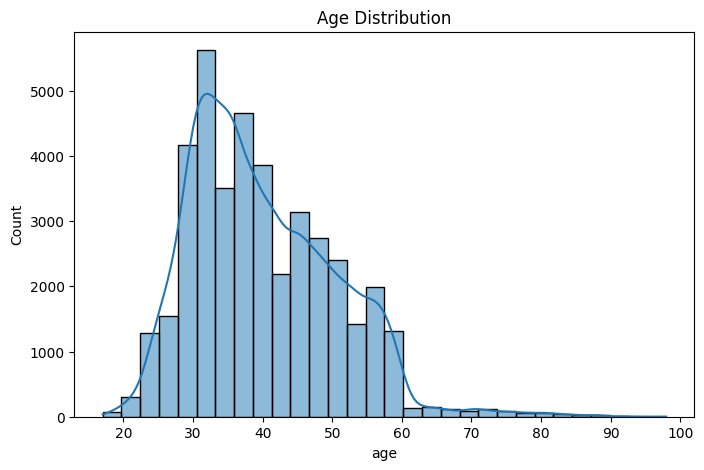

In [13]:
# Example: Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


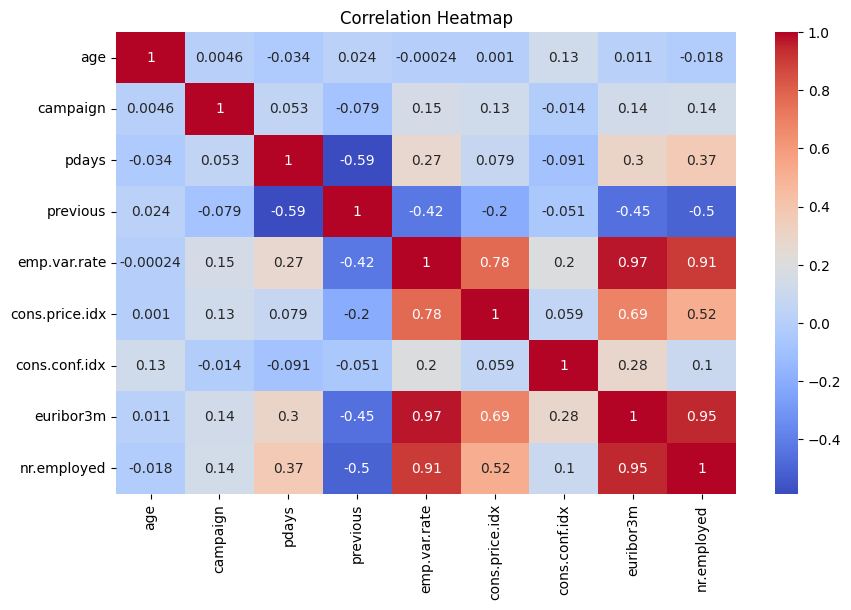

In [14]:
#Correlation heatmap for numerical variables
num_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 6))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [15]:

# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Detect and remove outliers using IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("\nShape after outlier removal:", df.shape)



Shape after outlier removal: (24911, 20)


In [16]:
# Handle missing values
# for both numarical and categorical
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [17]:
#mode value imputation for categorical
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [18]:
#mean value imputation for numarical
for col in num_cols:
        df[col].fillna(df[col].mean(), inplace=True)

In [19]:
# Encode categorical variables -Lable Encoding
cat_cols.remove('y')  # exclude target

le = LabelEncoder()
for col in cat_cols:
  df[col] = le.fit_transform(df[col])

In [20]:
# Encode target variable (output variable)
df['y'] = df['y'].map({'yes': 1, 'no': 0})


In [21]:
# Feature matrix and target(selecting input and output features)
X = df.drop('y', axis=1)
y = df['y']


In [22]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [25]:
#Model Training & Evaluation

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
}    

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    results.append({"Model": name, "Accuracy": acc, "F1-Score": f1, "ROC-AUC": roc_auc})



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.52      0.55      4704
           1       0.57      0.63      0.60      4768

    accuracy                           0.58      9472
   macro avg       0.58      0.58      0.57      9472
weighted avg       0.58      0.58      0.57      9472


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      4704
           1       0.93      0.95      0.94      4768

    accuracy                           0.94      9472
   macro avg       0.94      0.94      0.94      9472
weighted avg       0.94      0.94      0.94      9472


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4704
           1       0.99      0.95      0.97      4768

    accuracy                           0.97      9472
   macro

In [26]:
#Model Comparison Report
result_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(result_df.sort_values(by='ROC-AUC', ascending=False))


Model Comparison:
                 Model  Accuracy  F1-Score   ROC-AUC
2        Random Forest  0.969911  0.969619  0.990581
1        Decision Tree  0.938450  0.939277  0.939249
0  Logistic Regression  0.576225  0.600438  0.607414


In [27]:
# Pick Random Forest as the best model
best_model = RandomForestClassifier(random_state=42)

# Train on the full resampled training set
best_model.fit(X_resampled, y_resampled)


# to make Streamlit app

# Save the trained best model
import joblib
joblib.dump(best_model, "best_model.pkl")

# Save the features used for training
joblib.dump(X.columns, "model_features.pkl")


['model_features.pkl']


## Model Comparison Report

We trained and evaluated four machine learning models using the Portuguese Bank Marketing dataset. The evaluation metrics used were **Accuracy**, **F1-Score**, and **ROC-AUC**. SMOTE was applied to balance the dataset before model training.

### Performance Summary:

| Model                | Accuracy | F1-Score | ROC-AUC |
|----------------------|----------|----------|---------|
| **Random Forest**     | 0.969    | 0.969     | 0.990   |
| Decision Tree        | 0.937    | 0.937     | 0.939   |
| Logistic Regression  | 0.580    | 0.595     | 0.607   |

### Recommended Model for Production:

** Random Forest Classifier**

- Achieved the **highest overall performance** in terms of:
  - **Accuracy (96.9%)**
  - **F1-Score (96.9%)**
  - **ROC-AUC (99.0%)**
- Robust against overfitting due to ensemble averaging
- Handles both numerical and categorical data well
- Easy to interpret with feature importance visualizations

###  Why Not Logistic Regression?
- Logistic Regression significantly underperformed with only **58% accuracy**
- Indicates **underfitting**, likely due to complex patterns in the dataset that linear models can't capture
"""





## Challenges Faced & Techniques Used

### 1. Missing Values
- Categorical features had entries labeled as `'unknown'`, which were treated as missing.
- **Solution**: Replaced `'unknown'` with `NaN`, then applied:
  - **Mean imputation** for numerical columns
  - **Mode imputation** for categorical columns

### 2. Outliers in Numeric Features
- Outliers were skewing feature distributions.
- **Solution**: Used **IQR method** to detect and remove extreme values.

### 3. Class Imbalance in Target Variable
- Target variable `y` was highly imbalanced (`yes` ≪ `no`).
- **Solution**: Applied **SMOTE** (Synthetic Minority Oversampling Technique) to balance the class distribution.

### 4. Influential Feature: `duration`
- The `duration` column heavily influenced predictions but wasn’t usable in a real-world scenario.
- **Solution**: Dropped this column to prevent data leakage.

### 5. Categorical Encoding
- Categorical columns needed transformation for model compatibility.
- **Solution**: Used **Label Encoding** for all categorical variables.

### 6. Model Evaluation
- Needed to compare different models effectively.
- **Solution**: Evaluated models using **Accuracy**, **F1-Score**, and **ROC-AUC** to choose the best performer.
"""